# Feature Engineering

-   Create new features based on insights from EDA
-   Handle categorical variables (encoding)
-   Normalize or standardize numerical features
-   Feature selection

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import pandas as pd
import numpy as np
import sqlite3

# Add the project root to the Python path
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))

from src.visualization.distribution_plots import *

from src.features.feature_eng import *
from src.features.constants.RAW_FEATURES import RAW_FEATURES
from src.features.constants.EXISTING_FEATURES import EXISTING_FEATURES
from src.features.constants.ENGINEERED_FEATURES import ENGINEERED_FEATURES

In [2]:
from src.data.create_processed_teams import load_processed_teams_df

# Assuming you're in the project root directory
target_db_path = '../data/03_processed/processed_teams.db'
processed_teams_df = load_processed_teams_df(target_db_path)

# Now you can work with the transformed_teams_df
print(processed_teams_df.shape)

(20750, 144)


In [3]:
# 1. Create existing features
existing_features = [feature['name'] for feature in EXISTING_FEATURES]
df_existing = processed_teams_df[existing_features]

# 2. Create engineered features
engineered_features = {}

for feature in ENGINEERED_FEATURES:
    if 'variants' in feature:
        base_name = feature['base_name']
        for variant in feature['variants']:
            suffix = variant['suffix']
            func_name = variant['function']
            params = variant.get('params', {})
            
            feature_name = f"{base_name}_{suffix}"
            engineered_features[feature_name] = globals()[func_name](processed_teams_df, base_name, **params)
    else:
        feature_name = feature['name']
        func_name = feature['function']
        params = feature.get('params', {})
        
        engineered_features[feature_name] = globals()[func_name](processed_teams_df, **params)

df_engineered = pd.DataFrame(engineered_features)

# 3. Combine all features
df_final = pd.concat([df_existing, df_engineered], axis=1)

# 5. Save to DB
output_path_db = '../data/04_features/features_teams.db'

# Create a connection to the SQLite database
conn = sqlite3.connect(output_path_db)

# Drop the existing table if it exists
conn.execute("DROP TABLE IF EXISTS features_teams")

# Save the DataFrame to the database, overwriting any existing table
df_final.to_sql('features_teams', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

print(f"\nPreprocessed features data saved to: {output_path_db}")

print(f"Final dataframe shape: {df_final.shape}")
print(f"Columns: {df_final.columns.tolist()}")


Preprocessed features data saved to: ../data/04_features/features_teams.db
Final dataframe shape: (20750, 180)
Columns: ['year', 'week', 'start_date', 'is_home', 'season_type', 'neutral_site', 'conference_game', 'team_id', 'opponent_id', 'team_conference', 'opponent_conference', 'venue_id', 'team_pregame_elo', 'opponent_pregame_elo', 'avg_line_spread', 'team_recruiting_rank', 'opponent_recruiting_rank', 'team_recruiting_points', 'opponent_recruiting_points', 'team_talent', 'opponent_talent', 'win', 'totalYards_last_3', 'totalYards_last_10', 'firstDowns_last_3', 'firstDowns_last_10', 'possessionMinutes_last_3', 'possessionMinutes_last_10', 'thirdDownPct_last_3', 'thirdDownPct_last_10', 'fourthDownPct_last_3', 'fourthDownPct_last_10', 'passingTDs_last_3', 'passingTDs_last_10', 'netPassingYards_last_3', 'netPassingYards_last_10', 'completionPct_last_3', 'completionPct_last_10', 'yardsPerPass_last_3', 'yardsPerPass_last_10', 'rushingTDs_last_3', 'rushingTDs_last_10', 'rushingYards_last_3'

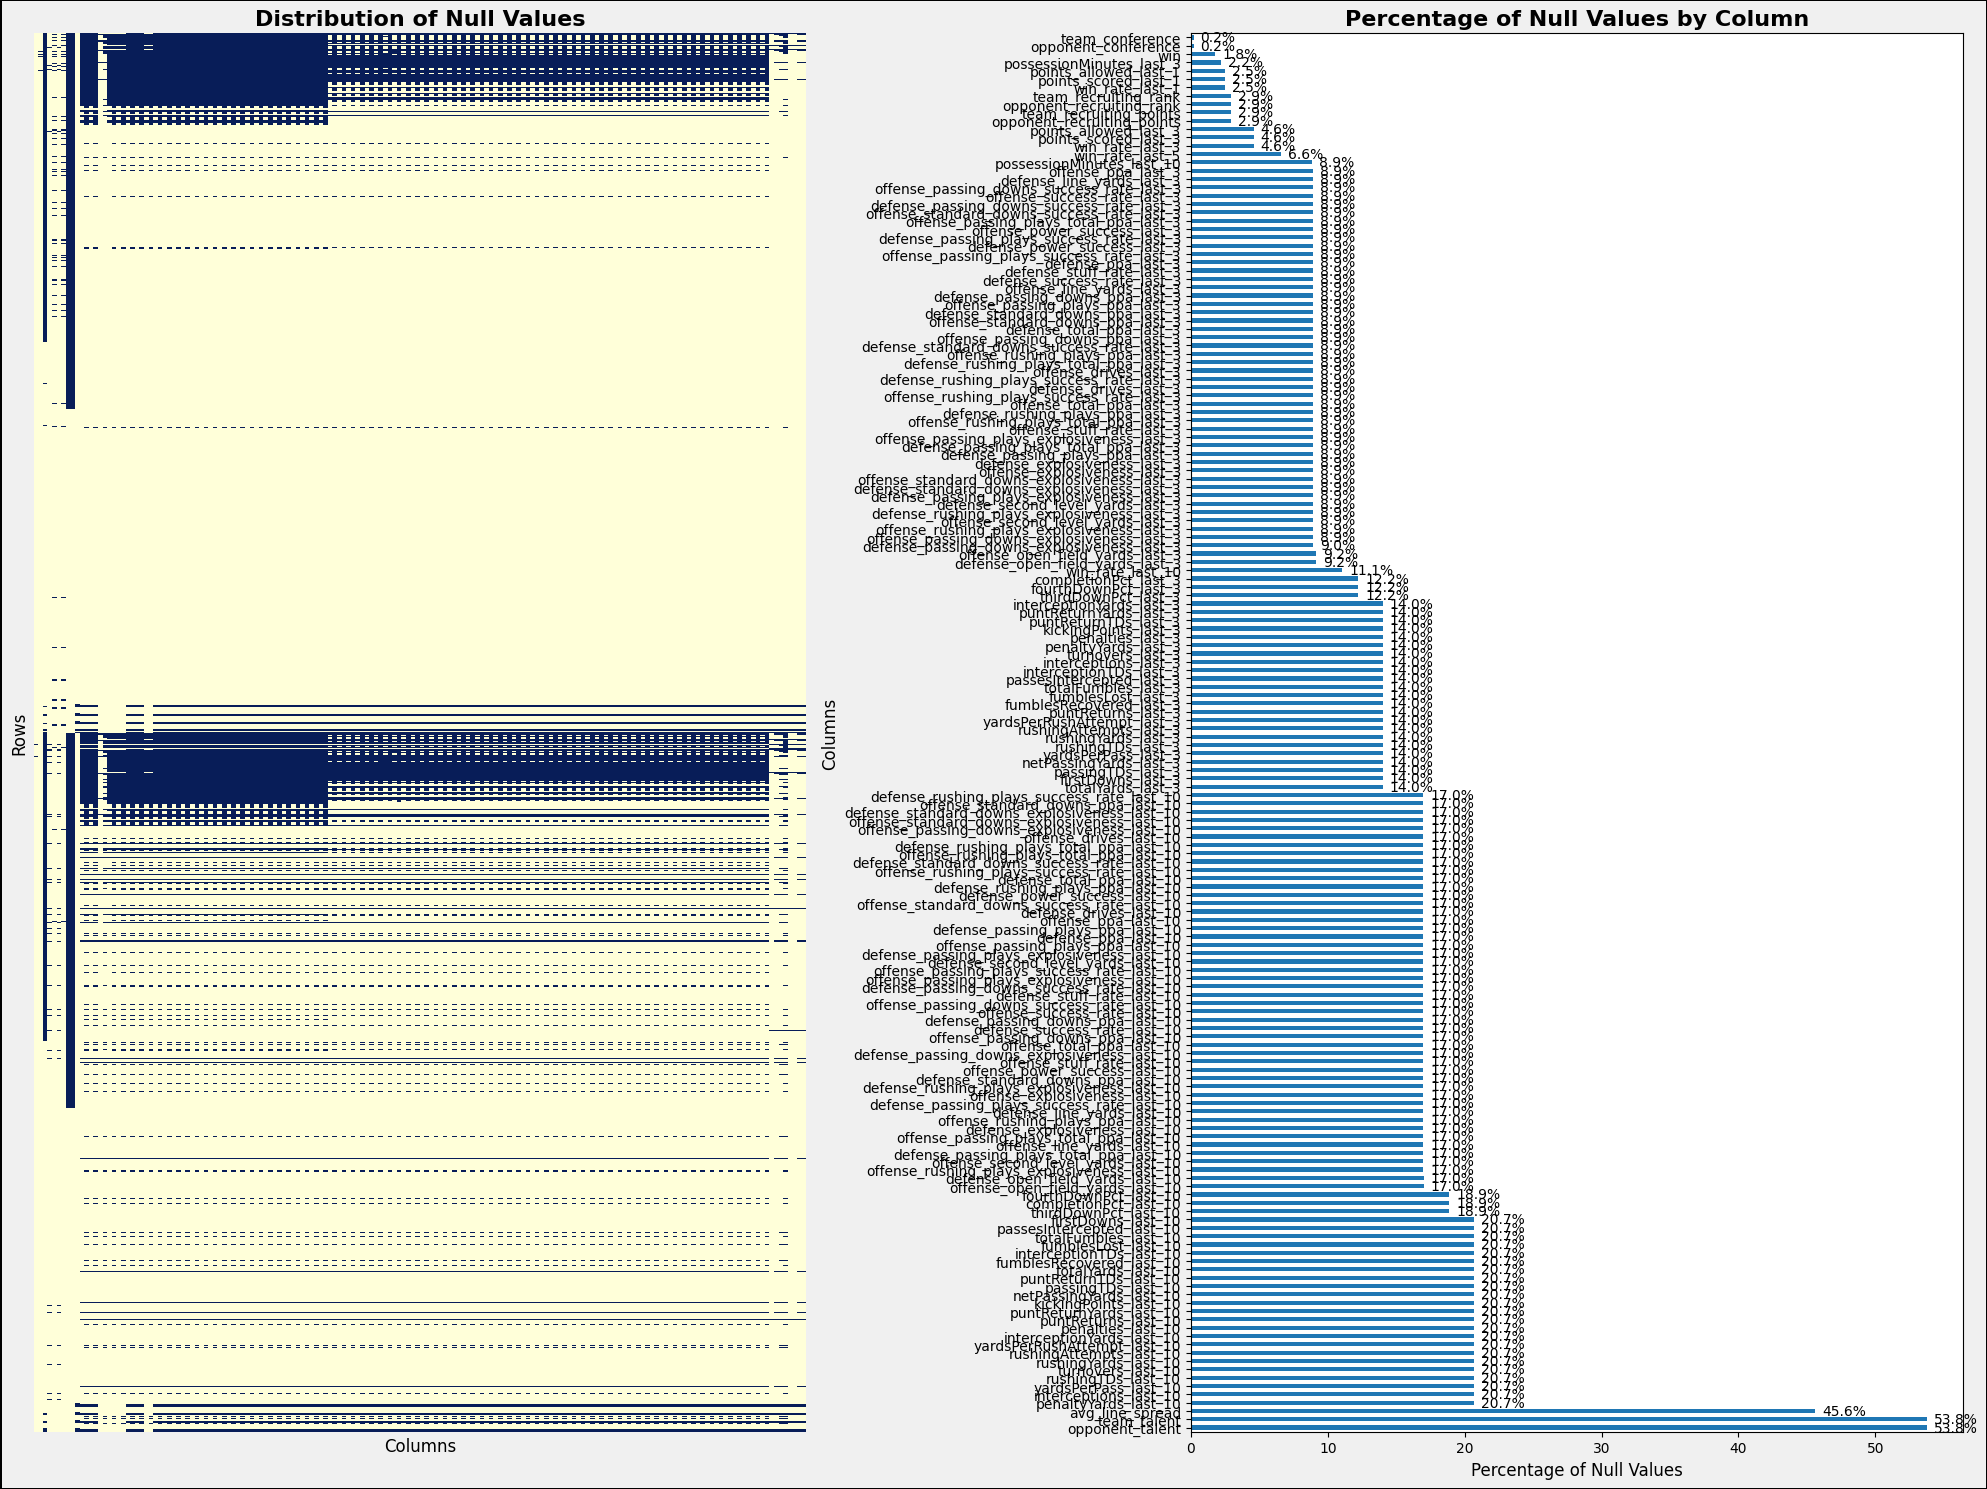

Columns with null values (sorted by percentage, descending):
opponent_talent: 11154 null values (53.75%)
team_talent: 11154 null values (53.75%)
avg_line_spread: 9464 null values (45.61%)
penaltyYards_last_10: 4289 null values (20.67%)
interceptions_last_10: 4289 null values (20.67%)
yardsPerPass_last_10: 4289 null values (20.67%)
rushingTDs_last_10: 4289 null values (20.67%)
turnovers_last_10: 4289 null values (20.67%)
rushingYards_last_10: 4289 null values (20.67%)
rushingAttempts_last_10: 4289 null values (20.67%)
yardsPerRushAttempt_last_10: 4289 null values (20.67%)
interceptionYards_last_10: 4289 null values (20.67%)
penalties_last_10: 4289 null values (20.67%)
puntReturns_last_10: 4289 null values (20.67%)
puntReturnYards_last_10: 4289 null values (20.67%)
kickingPoints_last_10: 4289 null values (20.67%)
netPassingYards_last_10: 4289 null values (20.67%)
passingTDs_last_10: 4289 null values (20.67%)
puntReturnTDs_last_10: 4289 null values (20.67%)
totalYards_last_10: 4289 null v

In [4]:
visualize_null_values(df_final)

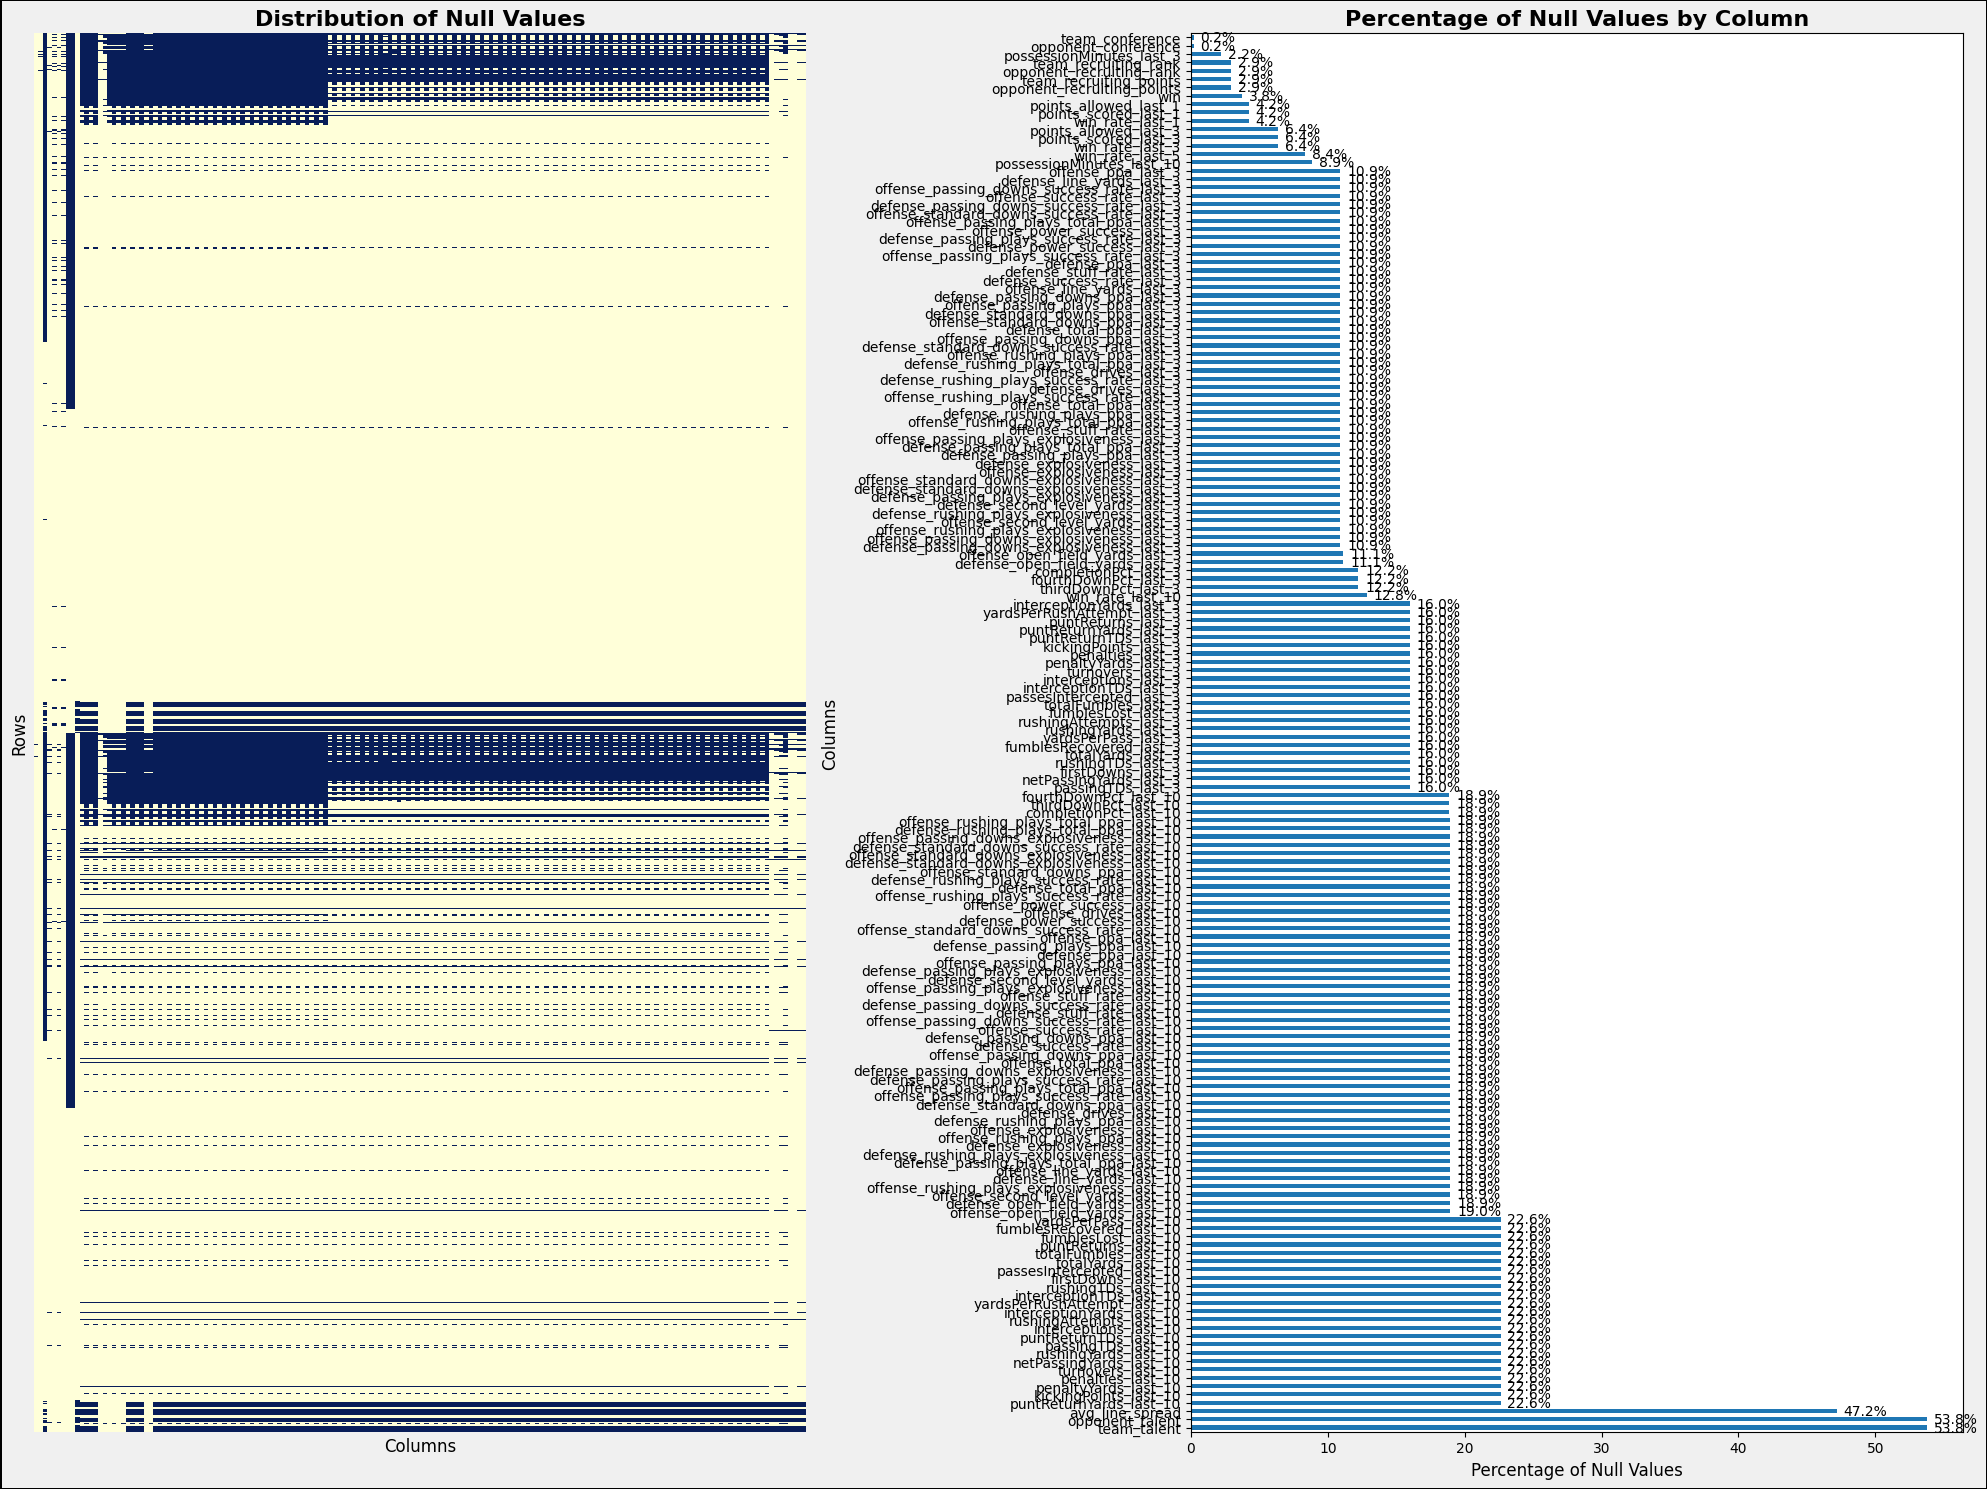

Columns with null values (sorted by percentage, descending):
team_talent: 11154 null values (53.75%)
opponent_talent: 11154 null values (53.75%)
avg_line_spread: 9788 null values (47.17%)
puntReturnYards_last_10: 4694 null values (22.62%)
kickingPoints_last_10: 4694 null values (22.62%)
penaltyYards_last_10: 4694 null values (22.62%)
penalties_last_10: 4694 null values (22.62%)
turnovers_last_10: 4694 null values (22.62%)
netPassingYards_last_10: 4694 null values (22.62%)
rushingYards_last_10: 4694 null values (22.62%)
passingTDs_last_10: 4694 null values (22.62%)
puntReturnTDs_last_10: 4694 null values (22.62%)
interceptions_last_10: 4694 null values (22.62%)
rushingAttempts_last_10: 4694 null values (22.62%)
interceptionYards_last_10: 4694 null values (22.62%)
yardsPerRushAttempt_last_10: 4694 null values (22.62%)
interceptionTDs_last_10: 4694 null values (22.62%)
rushingTDs_last_10: 4694 null values (22.62%)
firstDowns_last_10: 4694 null values (22.62%)
passesIntercepted_last_10: 46

In [7]:
visualize_null_values(df_final)

## APPENDIX

In [2]:
# Load the data
df_all_years = pd.read_parquet('../data/02_interim/df_all_years.parquet')
df_2016_plus = pd.read_parquet('../data/02_interim/df_2016_plus.parquet')

In [3]:
def process_and_analyze_df(df, df_name):
    # Engineer features
    df_engineered = engineer_features(df)

    # Select all features
    df_selected = select_features(df_engineered)

    # Preprocess the data (this combines engineering and selection)
    df_preprocessed = preprocess_data(df)

    return df_preprocessed

In [9]:
# Process and analyze each DataFrame
df_all_years_preprocessed = process_and_analyze_df(df_all_years, "All Years Data")
df_2016_plus_preprocessed = process_and_analyze_df(df_2016_plus, "2016+ Data")

In [10]:
# Save the preprocessed data
output_path_all_years = '../data/03_processed/preprocessed_all_years.parquet'
output_path_2016_plus = '../data/03_processed/preprocessed_2016_plus.parquet'

df_all_years_preprocessed.to_parquet(output_path_all_years, index=False)
df_2016_plus_preprocessed.to_parquet(output_path_2016_plus, index=False)

print(f"\nPreprocessed all years data saved to: {output_path_all_years}")
print(f"Preprocessed 2016+ data saved to: {output_path_2016_plus}")



Preprocessed all years data saved to: ../data/03_processed/preprocessed_all_years.parquet
Preprocessed 2016+ data saved to: ../data/03_processed/preprocessed_2016_plus.parquet


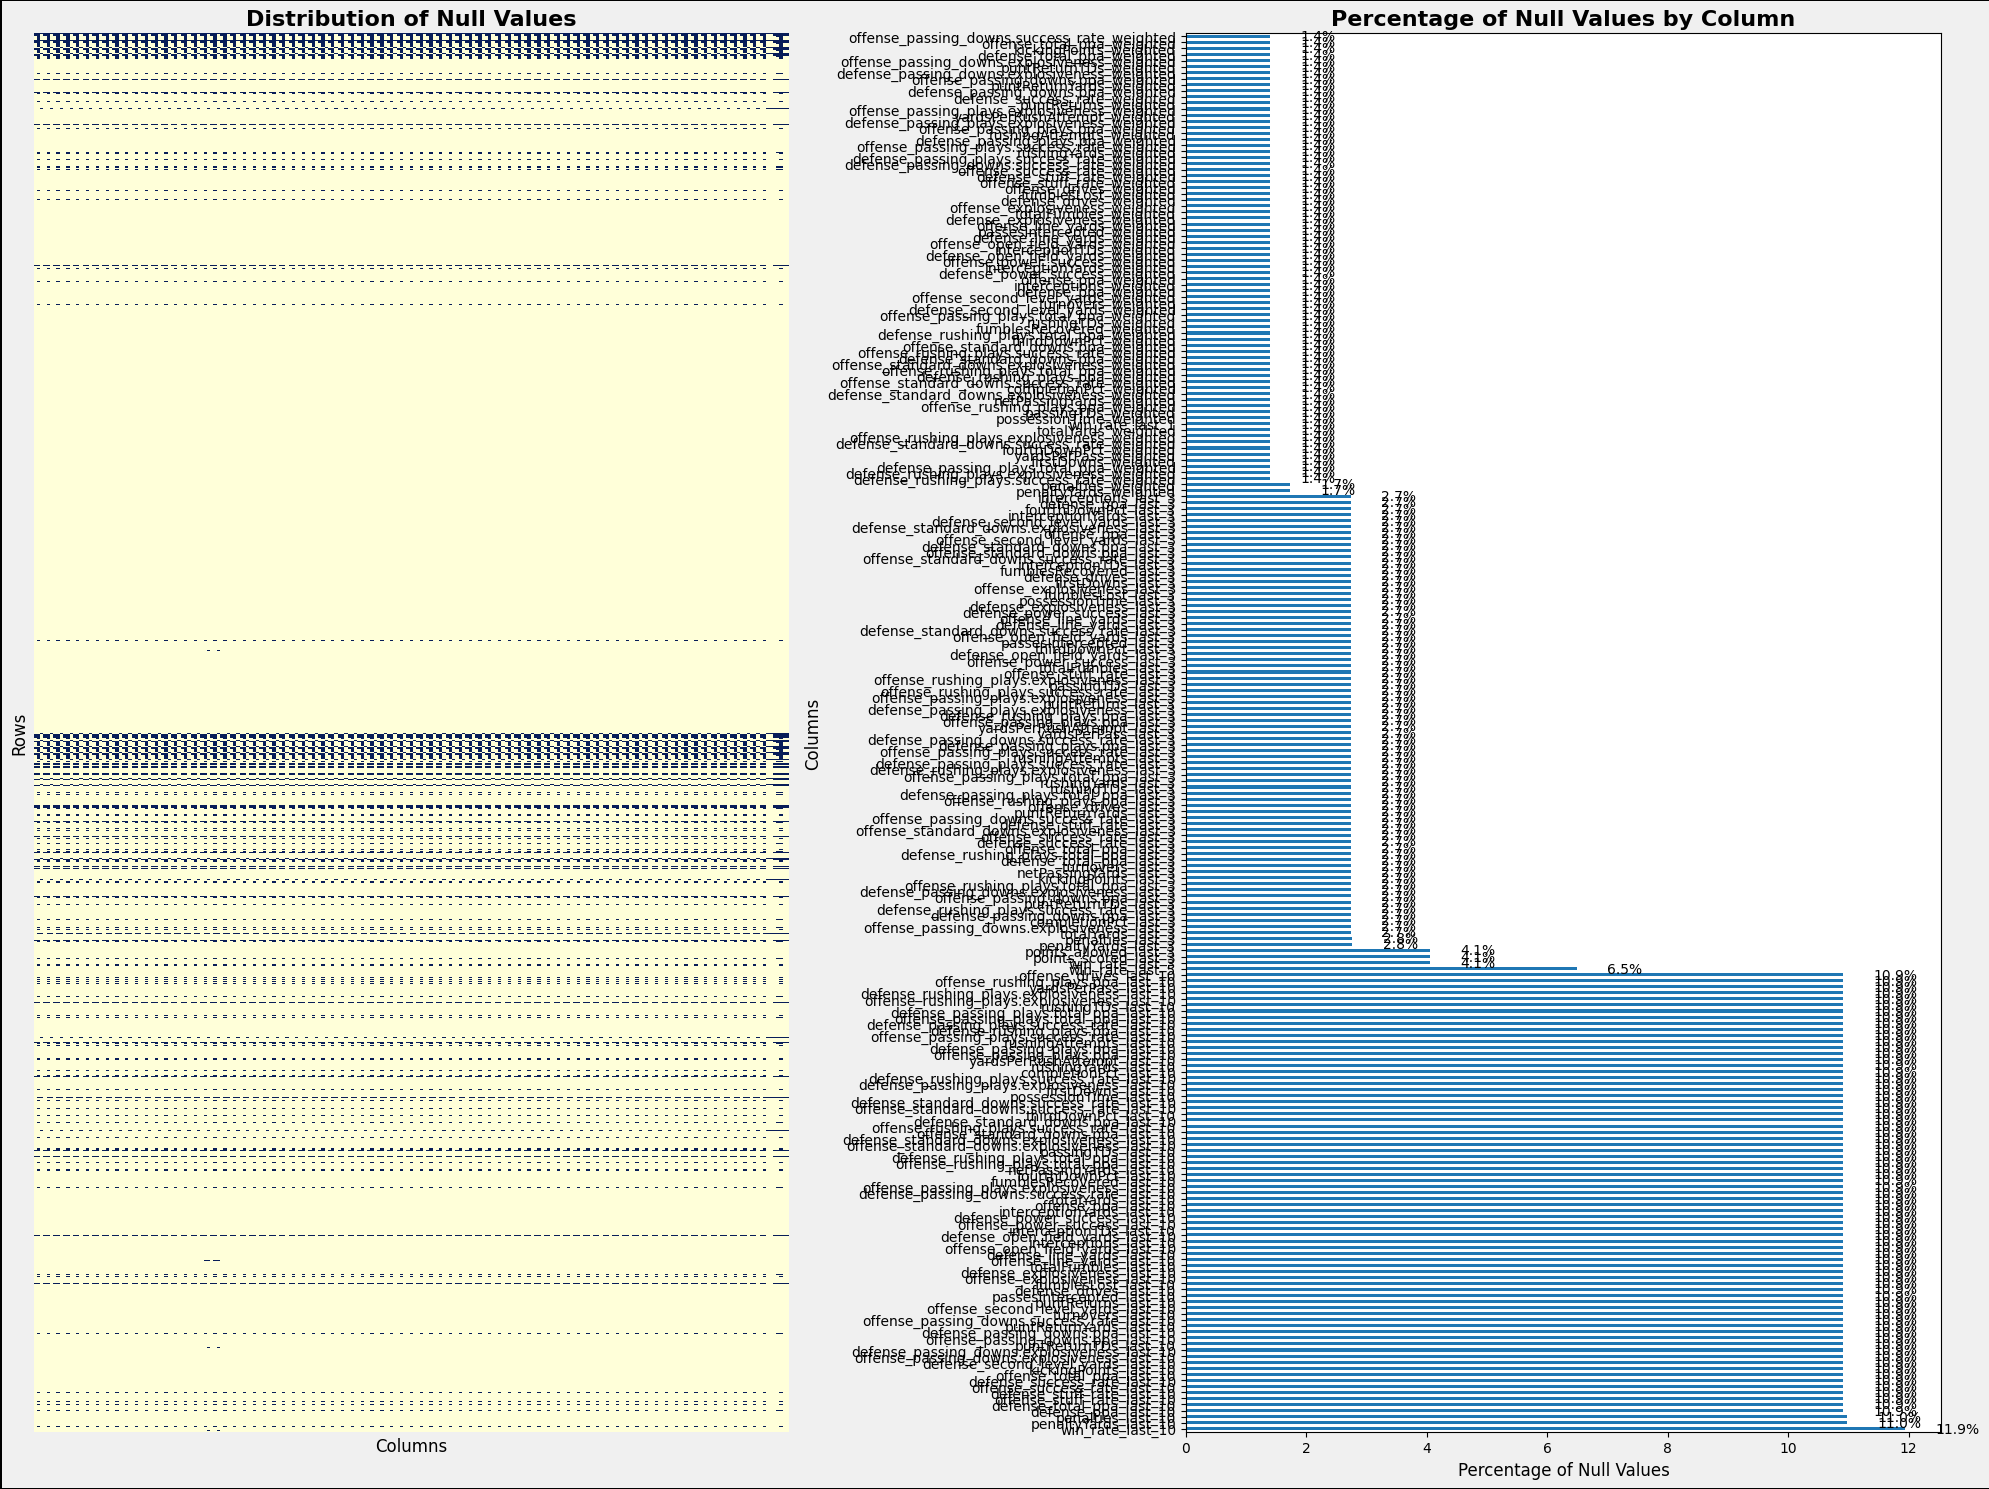

Columns with null values (sorted by percentage, descending):
win_rate_last_10: 1964 null values (11.95%)
penaltyYards_last_10: 1805 null values (10.98%)
penalties_last_10: 1805 null values (10.98%)
defense_ppa_last_10: 1795 null values (10.92%)
defense_total_ppa_last_10: 1795 null values (10.92%)
offense_stuff_rate_last_10: 1795 null values (10.92%)
defense_stuff_rate_last_10: 1795 null values (10.92%)
offense_success_rate_last_10: 1795 null values (10.92%)
defense_success_rate_last_10: 1795 null values (10.92%)
offense_total_ppa_last_10: 1795 null values (10.92%)
kickingPoints_last_10: 1795 null values (10.92%)
defense_second_level_yards_last_10: 1795 null values (10.92%)
offense_passing_downs.explosiveness_last_10: 1795 null values (10.92%)
defense_passing_downs.explosiveness_last_10: 1795 null values (10.92%)
puntReturnTDs_last_10: 1795 null values (10.92%)
offense_passing_downs.ppa_last_10: 1795 null values (10.92%)
defense_passing_downs.ppa_last_10: 1795 null values (10.92%)
puntR

In [11]:
visualize_null_values(df_all_years_preprocessed)

In [168]:
# Sort df_all_years by start_date in descending order and take the latest 500 rows
df_random = df_all_years.sort_values('start_date', ascending=False).head(500).reset_index(drop=True)

In [169]:
df_random_preprocessed = process_and_analyze_df(df_random, "Random")

Calculating feature: win_rate_last_5
Feature win_rate_last_5 shape: (500,)
Calculating feature: win_rate_last_10
Feature win_rate_last_10 shape: (500,)
Calculating feature: win_rate_season
Calculating season win rate
Season win rate calculation complete. Shape: (500,)
Feature win_rate_season shape: (500,)
Calculating feature: points_scored_last_3
Feature points_scored_last_3 shape: (500,)
Calculating feature: points_allowed_last_3
Feature points_allowed_last_3 shape: (500,)
Calculating feature: win_rate_last_5
Feature win_rate_last_5 shape: (500,)
Calculating feature: win_rate_last_10
Feature win_rate_last_10 shape: (500,)
Calculating feature: win_rate_season
Calculating season win rate
Season win rate calculation complete. Shape: (500,)
Feature win_rate_season shape: (500,)
Calculating feature: points_scored_last_3
Feature points_scored_last_3 shape: (500,)
Calculating feature: points_allowed_last_3
Feature points_allowed_last_3 shape: (500,)


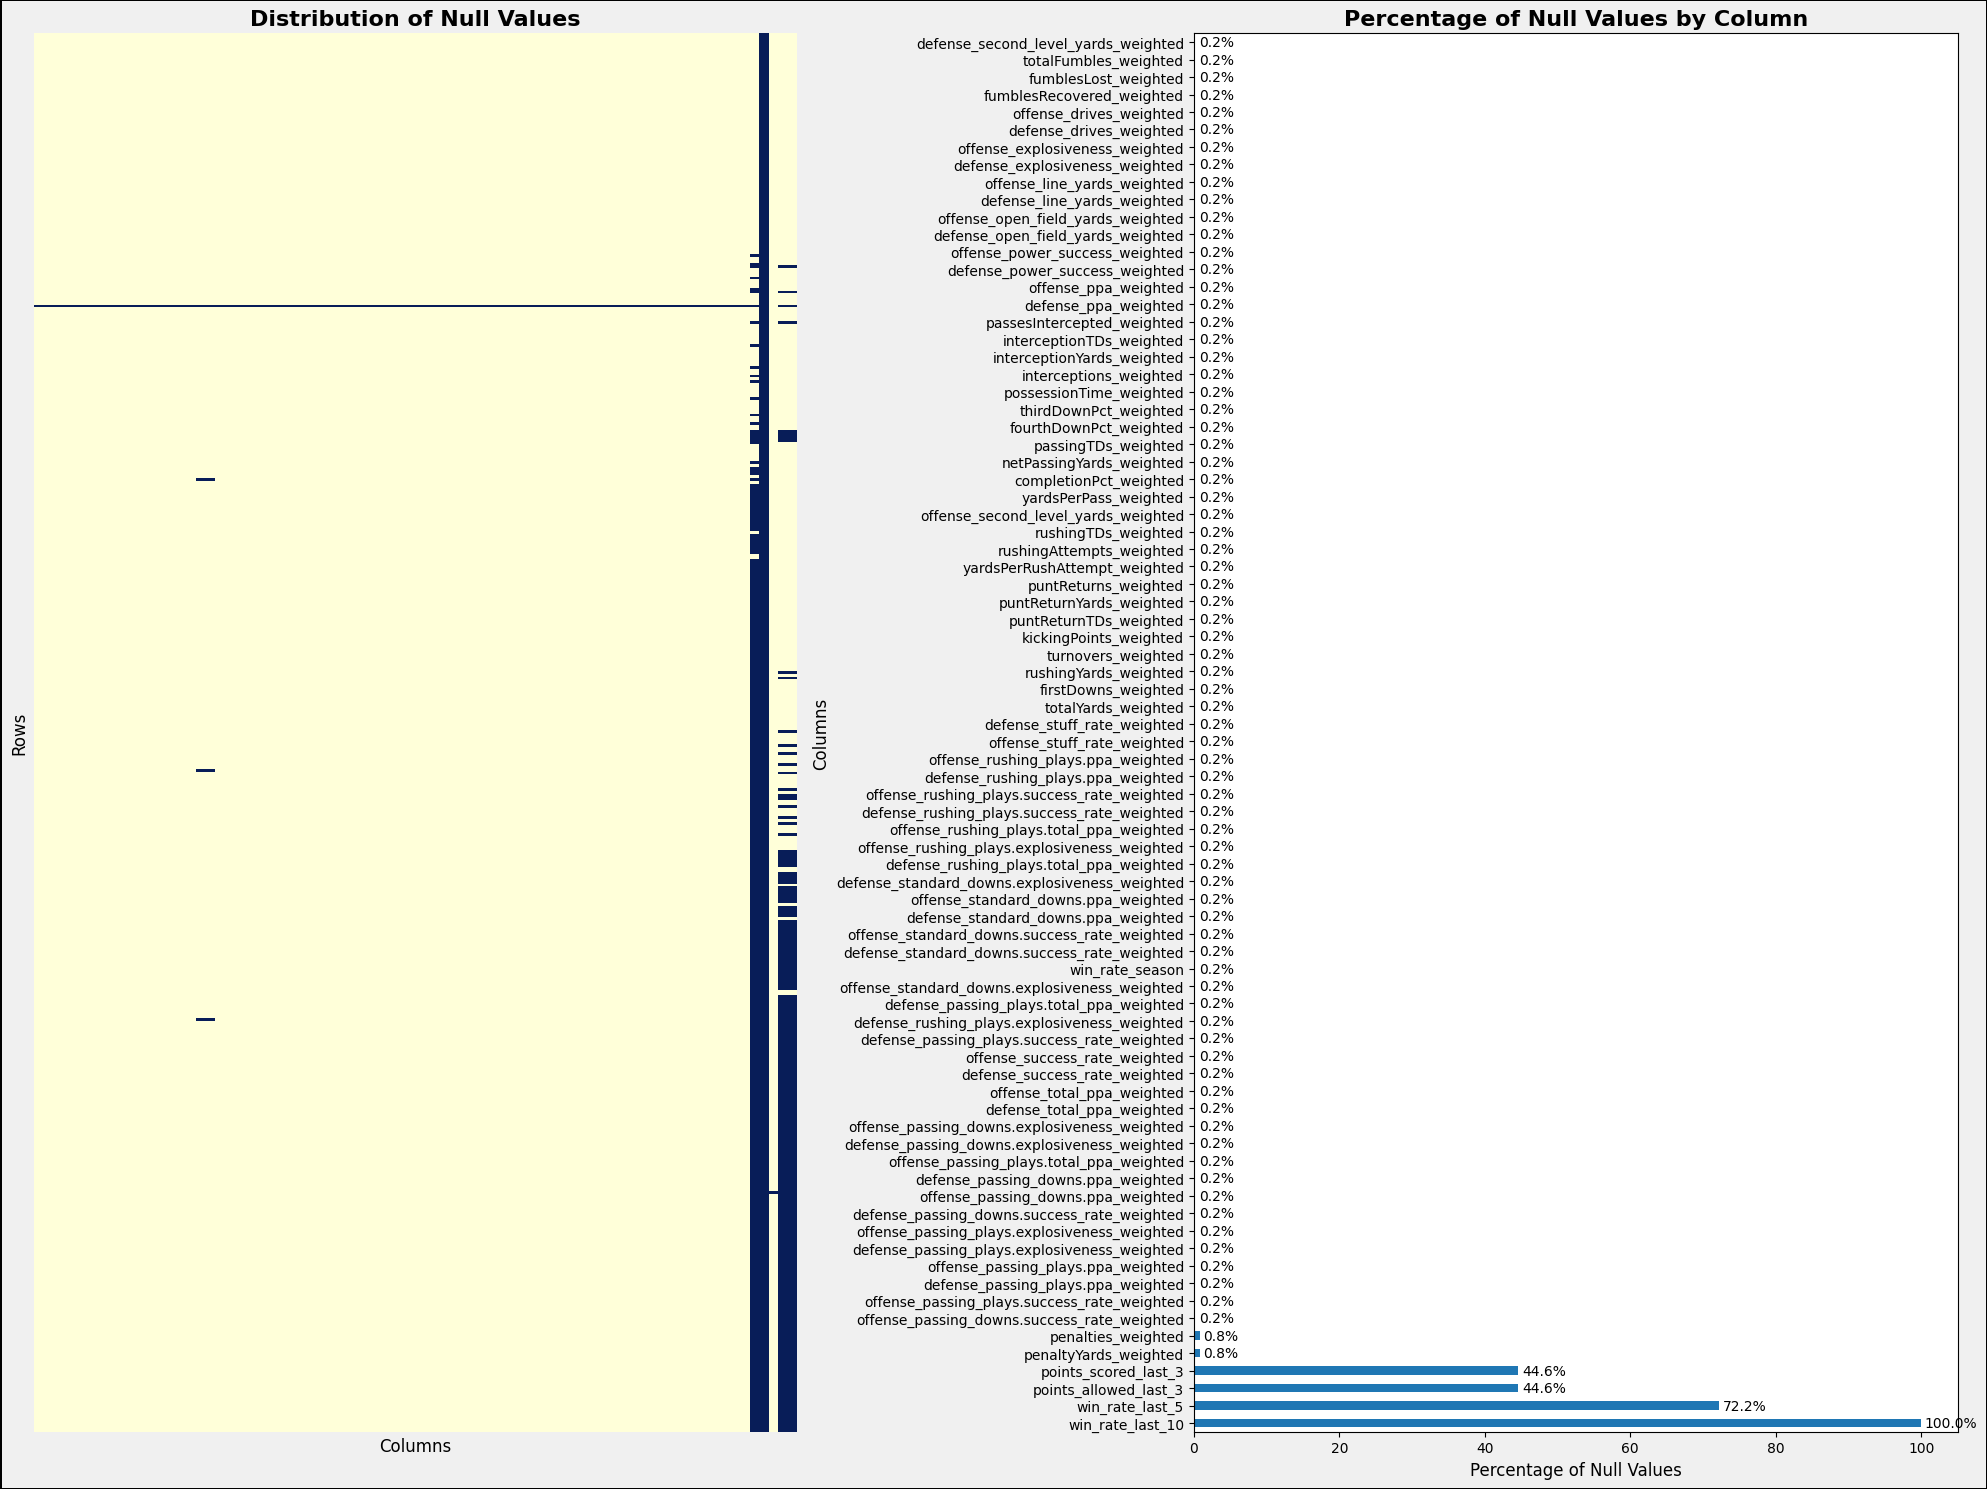

Columns with null values (sorted by percentage, descending):
win_rate_last_10: 500 null values (100.00%)
win_rate_last_5: 361 null values (72.20%)
points_allowed_last_3: 223 null values (44.60%)
points_scored_last_3: 223 null values (44.60%)
penaltyYards_weighted: 4 null values (0.80%)
penalties_weighted: 4 null values (0.80%)
offense_passing_downs.success_rate_weighted: 1 null values (0.20%)
offense_passing_plays.success_rate_weighted: 1 null values (0.20%)
defense_passing_plays.ppa_weighted: 1 null values (0.20%)
offense_passing_plays.ppa_weighted: 1 null values (0.20%)
defense_passing_plays.explosiveness_weighted: 1 null values (0.20%)
offense_passing_plays.explosiveness_weighted: 1 null values (0.20%)
defense_passing_downs.success_rate_weighted: 1 null values (0.20%)
offense_passing_downs.ppa_weighted: 1 null values (0.20%)
defense_passing_downs.ppa_weighted: 1 null values (0.20%)
offense_passing_plays.total_ppa_weighted: 1 null values (0.20%)
defense_passing_downs.explosiveness_we

In [170]:
visualize_null_values(df_random_preprocessed)